In [1]:
# Tanawat Panitpongsri UID 706306642

# HW9 - ECON425T - Winter 2024

# Problem 3

In [2]:
import pandas as pd
# from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### (a)

In [3]:
from sklearn.datasets import fetch_olivetti_faces

# Fetch the Olivetti faces dataset
data = fetch_olivetti_faces()
faces = data.images
targets = data.target

### (b)

In [4]:
faces = data.data  # The faces are reshaped in 2D

# Mean face
mean_face = faces.mean(axis=0)

# Demean face in the dataset
demeaned_faces = faces - mean_face

### (c)

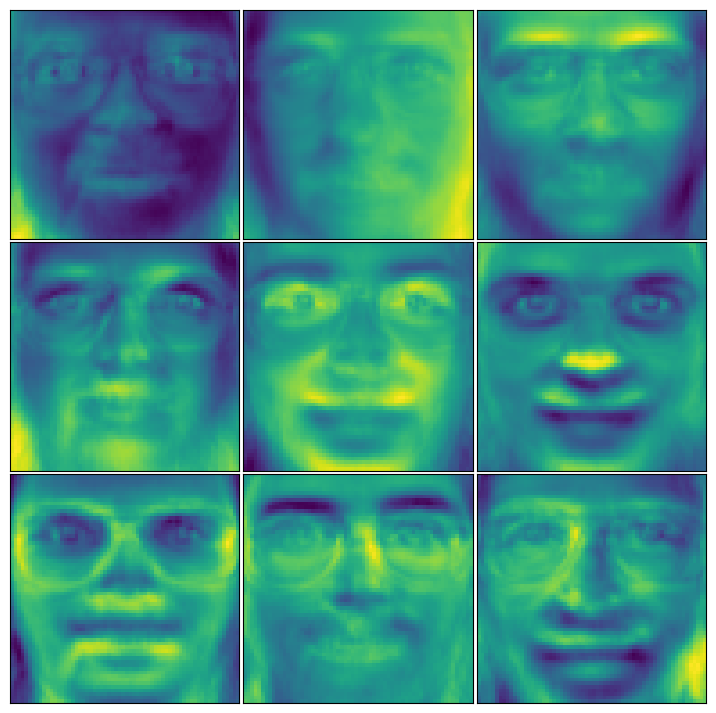

In [5]:
from sklearn.decomposition import PCA

# Compute the PCA
n_components = 9
pca = PCA(n_components=n_components, whiten=True)
pca.fit(demeaned_faces)

# Get the eigenfaces
eigenfaces = pca.components_.reshape((n_components, 64, 64))

# Display the first 9 eigenfaces
fig, axes = plt.subplots(3, 3, figsize=(9, 9),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i])

plt.show()

### (d)

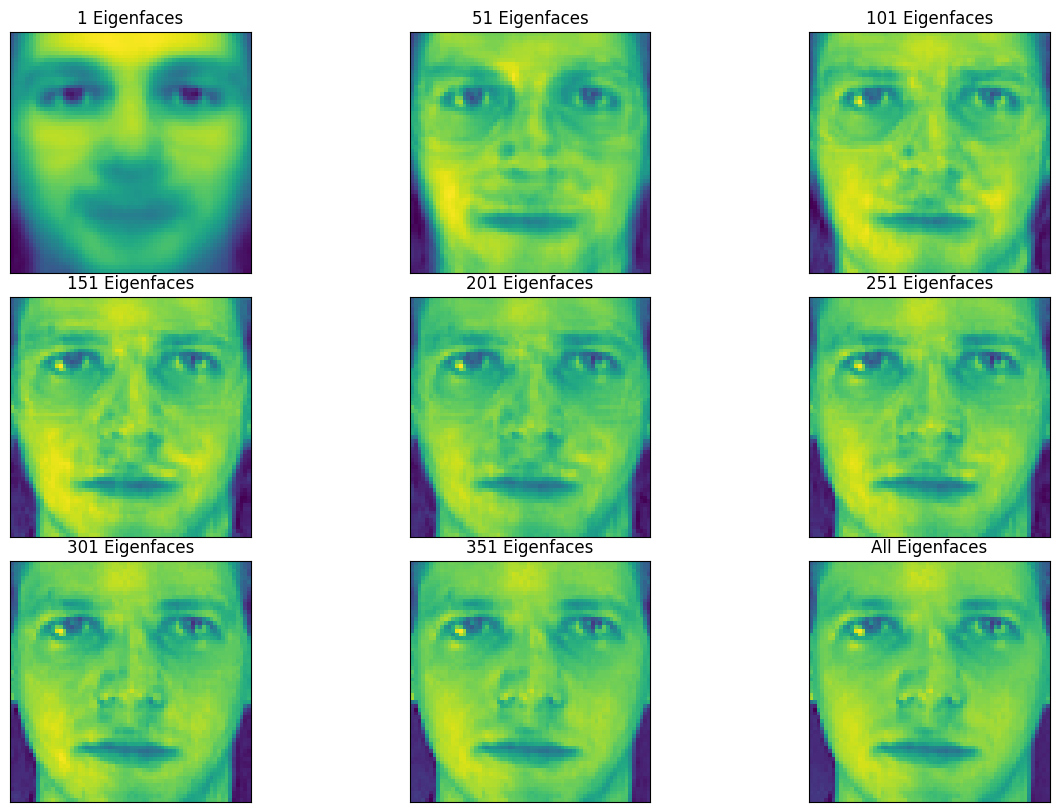

In [8]:
selected_face = faces[0]

# Demean the selected face
mean_face = faces.mean(axis=0)
demeaned_face = selected_face - mean_face

# Compute the PCA with all components
pca = PCA()
pca.fit(faces)

# Show face progresses by using varying number of of eigenfaces
components_to_use = [1, 51, 101, 151, 201, 251, 301, 351, pca.n_components_]
reconstructed_faces = []

for n_components in components_to_use:
    # Project the demeaned face onto the first n_components principal components
    coefficients = np.dot(demeaned_face, pca.components_[:n_components].T)
    
    # Reconstruct the face from the coefficients and eigenfaces
    reconstructed_face = mean_face + np.dot(coefficients, pca.components_[:n_components])
    
    # Store the reconstructed face
    reconstructed_faces.append(reconstructed_face.reshape(64, 64))

# Display faces
fig, axes = plt.subplots(3, 3, figsize=(15, 10),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(reconstructed_faces[i])
    ax.set_title(f"{components_to_use[i]} Eigenfaces" if i < len(components_to_use) - 1 else "All Eigenfaces")
plt.show()
